# What is CNN ?


#### A CNN is a neural network that typically contains several types of layers, which includes :-

* convolutional layer 
* pooling layer, and 
* activation layer.

## Convolutional Layer

* To understand what a CNN is, you need to understand how convolutions work. 

* Imagine you have an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide that 3x3 window around the image. 

* At each position the 3x3 visits, you matrix multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. 

* This results in a single number the represents all the values in that window of the image. 

Here’s a gif for clarity:

![Conv Gif](./conv.gif)

## Level - 1 - Code the Convolutional Layer


![Detailed Conv Gif](./conv_detailed.gif)

In [1]:
import math
import numpy as np

### Question 1

### Write a function which does the convolution.
### Code for a 3d Matrix

# Defining the parameters (input,filters(w) and bias)

In [2]:
X = np.random.rand(3,5,5) # Getting X of Dimension 5*5 and 3 as the color
w = np.random.normal(size=(3,3,2,2)) # Getting 3 filters of dimension 2*2 and depth 3
b = np.random.normal(size = (3,1)) # Getting 3 bias

# Input (X)

In [3]:
X

array([[[ 0.51841386,  0.89845872,  0.82506312,  0.11946335,  0.49426438],
        [ 0.08325383,  0.09906191,  0.80920223,  0.40173322,  0.19682683],
        [ 0.75550446,  0.34523086,  0.55404509,  0.10126961,  0.3455254 ],
        [ 0.34052429,  0.20902109,  0.79677725,  0.39241654,  0.15637483],
        [ 0.71250053,  0.01925244,  0.69728481,  0.03868646,  0.60587785]],

       [[ 0.95460252,  0.60282266,  0.84452099,  0.75265706,  0.2780016 ],
        [ 0.74476634,  0.85318383,  0.96500945,  0.9513608 ,  0.22980031],
        [ 0.6332667 ,  0.76956965,  0.69242328,  0.59153773,  0.20749078],
        [ 0.00824629,  0.1646853 ,  0.54532195,  0.32374192,  0.14409445],
        [ 0.16935372,  0.33736819,  0.29090089,  0.5683767 ,  0.25561864]],

       [[ 0.62610208,  0.08458407,  0.52316471,  0.83431414,  0.21747615],
        [ 0.7994862 ,  0.84090978,  0.83598283,  0.39927695,  0.04810012],
        [ 0.17381605,  0.85569424,  0.60092315,  0.3266901 ,  0.58129329],
        [ 0.60797882,

# Filters/Weights(w)

In [4]:
w

array([[[[-0.48428632,  1.06818439],
         [-0.07154352, -0.50965792]],

        [[-1.6162585 , -0.25056938],
         [ 0.60543525,  0.03336421]],

        [[ 0.78358304,  1.16150537],
         [-0.2563179 , -1.89297462]]],


       [[[ 0.22092077, -0.2051559 ],
         [-1.06689918,  0.1426919 ]],

        [[-0.69505262,  0.33753183],
         [-1.02275327,  1.6206981 ]],

        [[-1.02036339,  0.26906462],
         [-0.10768913, -0.42947005]]],


       [[[ 0.48765636,  0.80726785],
         [-0.22083047,  0.19569437]],

        [[-0.68469794, -0.94268822],
         [ 1.06556055,  0.5035872 ]],

        [[ 0.65841761, -0.96057252],
         [-1.03680688, -1.70251384]]]])

# Bias(b)

In [5]:
b

array([[-0.92797119],
       [-1.45703478],
       [-0.21789543]])

# Method to get a convolutional layer

# Method to get the cropped array for particular stride and  2D

In [6]:
def get_cropped_array_2D(image_channel, filter_row_num, filter_col_num, rows, columns, stride):
    cropped = []
    for row in range(rows):
        for column in range(columns):
            cropped_array = image_channel[row * stride : row * stride + filter_row_num, column * stride : column * stride + filter_col_num]
            cropped.append(cropped_array)
    return cropped

# Get convolution of 2D

In [7]:
def get_2D_conv(image,weight,stride):
    conved = []
    #getting the shape of filter
    filter_row, filter_column = weight.shape  
    #getting the shape of the input
    image_row, image_column = image.shape
    #getting the row of output image
    rows = math.ceil((image_row - filter_row)/stride + 1)
     #getting the column of output image
    columns = math.ceil((image_column - filter_column)/stride +1)
    conved_array = np.empty((rows,columns))
    cropped_array = get_cropped_array_2D(image,filter_row,filter_column,rows,columns,stride)
    for each_cropped_array in cropped_array:
        multiply_2d = np.sum(each_cropped_array * weight)
        conved.append(multiply_2d)
    conved_array = np.array(conved).reshape(rows,columns)
    return conved_array

# Get convolution of 3D

In [8]:
def get_conv_3D(image,filters,bias,stride):
    #getting number of filters
    conved_2D = 0
    conved_3D = []
    number_of_filter = len(w) 
    #getting the shape of filter
    filter_depth, filter_row, filter_column = w[0].shape  
    #getting the shape of the input
    X_depth, X_row, X_column = X.shape
    #getting the row of output image
    rows = math.ceil((X_row - filter_row)/stride + 1)
     #getting the column of output image
    columns = math.ceil((X_column - filter_column)/stride +1)
     #getting the depth of output image
    depths = number_of_filter
    #creating an empty array with above dimension
    for number in range(number_of_filter):
        for each_image_2D, subfilter in zip(image, filters[number]):
            conved_2D += get_2D_conv(each_image_2D,subfilter,stride)
        conved_2D += bias[number]
        conved_3D.append(conved_2D)
        conved_2D = 0
    return np.array(conved_3D)

# Calling the above method 

In [9]:
stride = 1
get_conv_3D(X, w, b, stride)

array([[[-2.69821171, -2.66254773, -1.99122884, -0.57644853],
        [-2.1620878 , -1.27732236, -1.99473491, -3.14116281],
        [-1.61096539, -2.7891393 , -2.70421559, -1.11261933],
        [-1.21429916, -0.61498997, -1.12123154, -2.61751321]],

       [[-2.50383915, -1.25571173, -2.45415913, -3.81888348],
        [-2.821582  , -2.80591597, -2.98702641, -2.99909725],
        [-1.70232098, -2.34818093, -3.32995381, -2.66257168],
        [-2.60946102, -1.49431308, -2.82903964, -2.62731443]],

       [[-1.16701784, -1.53299433, -1.60306808,  0.3857751 ],
        [-2.36690625, -1.968938  , -1.1357198 , -1.06274469],
        [-2.30112489, -2.11289129, -2.12986331, -1.37790414],
        [-1.26607457, -1.70706341, -0.78608337, -1.15509334]]])

## Pooling Layers

* Pooling works very much like convoluting, where we take a kernel and move the kernel over the image, the only difference is the function that is applied to the kernel and the image window isn’t linear.

* Max pooling and Average pooling are the most common pooling functions. 

* Max pooling takes the largest value from the window of the image currently covered by the kernel, while average pooling takes the average of all values in the window.

![Pooling Gif](./pooling.gif)

## Level - 2 - Code the Pooling Layer

![Detailed Conv Gif](./Max_pooling.png)

### Question 1

### Write a function which does the max pooling.
### Code for a 3d Matrix

In [10]:
def max_pooling(image, w, b, stride, window_size, window_stride):
    '''Method for max pooling'''
    #get convolution matrix
    max_2D = []
    max_3D = []
    conved_layer = get_conv_3D(image, w, b, stride)
    #get dimensions of convolution matrix
    conved_depth, conved_row, conved_column = conved_layer.shape
    #getting dimensions of pool matrix
    pool_row,pool_column = window_size
     #getting the row of output image
    rows = math.ceil((conved_row - pool_row)/window_stride) + 1
     #getting the column of output image
    columns = math.ceil((conved_column - pool_column)/window_stride) + 1
     #getting the row of output image
    depths = conved_depth
    #creating an empty array
    max_pool = np.empty((depths, rows, columns))
    for each_image_2D in conved_layer:
        cropped_2d = get_cropped_array_2D(each_image_2D,pool_row,pool_column,rows,columns,window_stride)
        for each_array in cropped_2d:
            max_2D.append(np.max(each_array))
        max_3D.append(max_2D)
        max_2D = []
    max_pool = np.array(max_3D).reshape(depths,rows,columns)
    return max_pool

### Question 2

### Write a function which does the average convolution.
### Code for a 3d Matrix

In [11]:
def avg_pooling(image, w, b, stride, window_size, window_stride):
    '''Method for avg pooling'''
    #get convolution matrix
    avg_2D = []
    avg_3D = []
    conved_layer = get_conv_3D(image, w, b, stride)
    #get dimensions of convolution matrix
    conved_depth, conved_row, conved_column = conved_layer.shape
    #getting dimensions of pool matrix
    pool_row,pool_column = window_size
     #getting the row of output image
    rows = math.ceil((conved_row - pool_row)/window_stride) + 1
     #getting the column of output image
    columns = math.ceil((conved_column - pool_column)/window_stride) + 1
     #getting the row of output image
    depths = conved_depth
    #creating an empty array
    max_pool = np.empty((depths, rows, columns))
    for each_image_2D in conved_layer:
        cropped_2d = get_cropped_array_2D(each_image_2D,pool_row,pool_column,rows,columns,window_stride)
        for each_array in cropped_2d:
            avg_2D.append(np.average(each_array))
        avg_3D.append(avg_2D)
        avg_2D = []
    avg_pool = np.array(avg_3D).reshape(depths,rows,columns)
    return avg_pool

# Getting the output of above max_pool and avg_pool methods

In [12]:
window_size = (2,2)
window_stride = 2
print('MAX POOLING: \n ',max_pooling(X, w, b, stride, window_size, window_stride))
print('\n')
print('AVERAGE POOLING: \n ',avg_pooling(X, w, b, stride, window_size, window_stride))

MAX POOLING: 
  [[[-1.27732236 -0.57644853]
  [-0.61498997 -1.11261933]]

 [[-1.25571173 -2.45415913]
  [-1.49431308 -2.62731443]]

 [[-1.16701784  0.3857751 ]
  [-1.26607457 -0.78608337]]]


AVERAGE POOLING: 
  [[[-2.2000424  -1.92589377]
  [-1.55734845 -1.88889492]]

 [[-2.34676221 -3.06479157]
  [-2.038569   -2.86221989]]

 [[-1.7589641  -0.85393937]
  [-1.84678854 -1.36223604]]]


# Lets Load an image and visualize the Conv and Pool

### Load the Conv and Max pool using Keras

In [13]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

%matplotlib inline

Using TensorFlow backend.


### Display the image

In [14]:
image = cv2.imread('data/cat.png') # Please load different Images to explore 

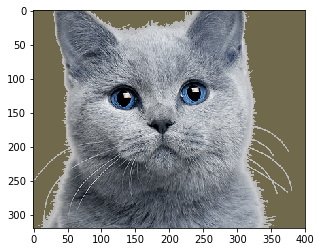

In [15]:
plt.imshow(image)

In [16]:
# what does the image look like?
image.shape

(320, 400, 3)

## Level 3 - Performing and Understading Convolutions 

### Question 1 

### Why it has 3 dimensions ?? 

Answer - The 1st dimension is the row data, 2nd dimension is the column data and the 3rd dimension is the color(RBG) or depth of the image

## Play Around with below code to enhance your understanding of CNN

## Lets create a model with 1 Convolutional layer

### Question 2

### Please fill in the comments 

In [17]:
model = Sequential()
model.add(Convolution2D(3,    # number of filters
                        (3,    # row dimension of kernel 
                        3),    # column dimension of kernel
                        input_shape=image.shape))

In [18]:
image_batch = np.expand_dims(image,axis=0)

### Question 3

### What Happens if we dont expand the dims of image ? Why we need to do it ?


Answer - It will throw an error because it requires 4 dimensions and we are giving it 3 dimensions

In [19]:
image_batch.shape

(1, 320, 400, 3)

In [20]:
conv_image = model.predict(image_batch)

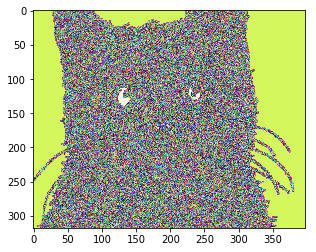

In [21]:
plt.imshow(np.squeeze(conv_image, axis=0))

In [22]:
def visualize_image(model, image):

    image_batch = np.expand_dims(image,axis=0)
    conv_image = model.predict(image_batch)
    
    # here we get rid of that added dimension and plot the image
    conv_image = np.squeeze(conv_image, axis=0)
    
    print (conv_image.shape)
    plt.imshow(conv_image)

(318, 398, 3)


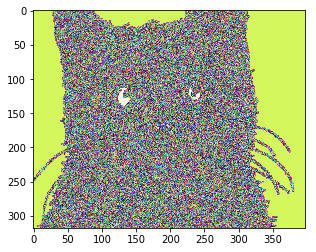

In [23]:
visualize_image(model, image)

## Level 4 - Use Your Conv Function to visualize the image

### Question 1 - Call your function to perform conv and plot the image obatined 

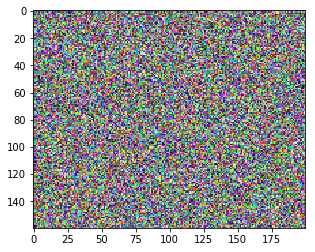

In [24]:
image_used = cv2.imread('data/cat.png')
image_used = image_used.reshape((3,320,400))
conved_image = get_conv_3D(image_used, w, b, 2)
conved_image1 = conved_image.reshape((160,200,3))
plt.imshow(conved_image1)

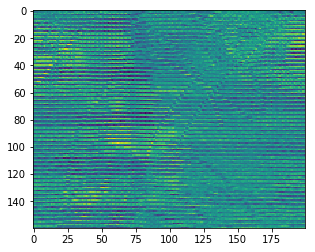

In [25]:
plt.imshow(conved_image[0,:,:])

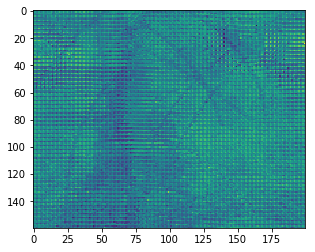

In [26]:
plt.imshow(conved_image[1,:,:])

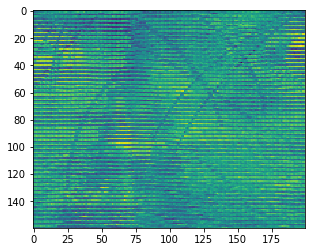

In [27]:
plt.imshow(conved_image[2,:,:])

## 10x10 Kernel Convimage

(311, 391, 3)


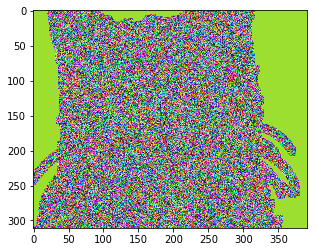

In [28]:
model = Sequential()
model.add(Convolution2D(3,    
                        (10,    
                        10),    
                        input_shape=image.shape))


visualize_image(model, image)

## Level 5

### Question 1

### What difference you notice between 3\*3 and 10\*10 kernal size ? 

Answer - The image is less denser in 10*10

### Question 2

### What is the reason behind this difference ?

Answer - Bigger filter is used so data is more compressed so the data loss occurs(eye/edges of ears) of the cat

# Play around with code below, to enhance your understading

## Another image Vis 

In [29]:
# Note: matplot lib is pretty inconsistent with how it plots these weird image arrays.

def nice_image_printer(model, image):
    '''prints the image as a 2d array'''
    image_batch = np.expand_dims(image,axis=0)
    conv_image2 = model.predict(image_batch)

    conv_image2 = np.squeeze(conv_image2, axis=0)
    print (conv_image2.shape)
    conv_image2 = conv_image2.reshape(conv_image2.shape[:2])

    print (conv_image2.shape)
    plt.imshow(conv_image2)

In [30]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))

(318, 398, 1)
(318, 398)


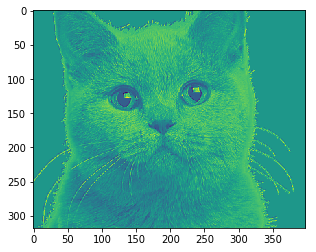

In [31]:
nice_image_printer(model, image)

### Question 3

### Why this image is different from previous one ?

Answer: Previous image has three color(RBG)(3D image) this one has 2 colors(2D)

## Increase the kernal size

(306, 386, 1)
(306, 386)


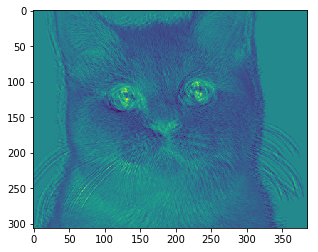

In [32]:
# 15x15 kernel size
model = Sequential()
model.add(Convolution2D(1,    
                        (15,    
                        15),   
                        input_shape=image.shape))

nice_image_printer(model, image)

## Adding a Relu Activation

In [33]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))



(318, 398, 1)
(318, 398)


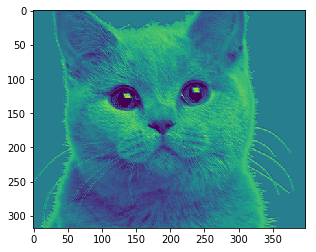

In [34]:
nice_image_printer(model, image)

## Adding a Max pool After Relu

(63, 79, 3)


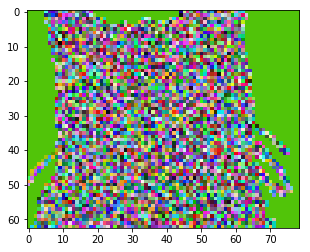

In [35]:
model = Sequential()
model.add(Convolution2D(3,    
                        (3,    
                        3),    
                        input_shape=image.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_image(model, image)